In [1]:
import geopandas as gpd
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt
from datetime import date
import folium
import zipfile
import matplotlib.pyplot as plt
import os

### Convert shapefile to geojson and export it

<AxesSubplot:>

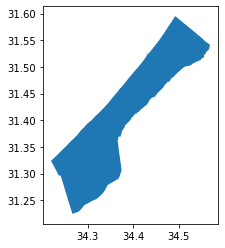

In [2]:
gdf = gpd.read_file('../Data/Shapefile/GazaStripAdminBoundary.shp')
# gdf.to_file('../Data/Shapefile/GazaStripAdminBoundary.geojson', driver='GeoJSON')
gdf.plot()

In [3]:
m = folium.Map([31.5, 34.4], zoom_start=10)
boundsdata = r'../Data/Shapefile/GazaStripAdminBoundaryExtent.geojson'
folium.GeoJson(boundsdata).add_to(m)
m

In [4]:
# connect to the API
api = SentinelAPI('adivicco', '354sedut@', 'https://scihub.copernicus.eu/dhus')

## Resource for Search Parameters
https://scihub.copernicus.eu/userguide/FullTextSearch

In [5]:
# search by polygon, time, and SciHub query keywords
footprint = geojson_to_wkt(read_geojson('../Data/Shapefile/GazaStripAdminBoundaryExtent.geojson'))
products_s1 = api.query(footprint,
                     date=(date(2021, 5, 13), date(2021, 5, 15)),
                     platformname='Sentinel-1',
                     producttype = 'SLC',
                     sensoroperationalmode= 'IW')

products_s2 = api.query(footprint,
                     date=(date(2021, 5, 20), date(2021, 5, 29)),
                     platformname='Sentinel-2',
                     producttype = 'S2MSI2A',
                     cloudcoverpercentage=(0, 5))

# convert to Pandas DataFrame
s1_products_df = api.to_dataframe(products_s1)
s2_products_df = api.to_dataframe(products_s2)

# print(footprint)
# Number of images found based on the search parameters
# print(len(products_s1.keys()))

In [6]:
s1_products_df.columns

Index(['title', 'link', 'link_alternative', 'link_icon', 'summary', 'ondemand',
       'beginposition', 'endposition', 'ingestiondate', 'missiondatatakeid',
       'orbitnumber', 'lastorbitnumber', 'relativeorbitnumber',
       'lastrelativeorbitnumber', 'slicenumber', 'filename', 'format',
       'identifier', 'size', 'status', 'timeliness', 'sensoroperationalmode',
       'swathidentifier', 'orbitdirection', 'producttype', 'platformname',
       'platformidentifier', 'instrumentname', 'instrumentshortname',
       'productclass', 'polarisationmode', 'acquisitiontype', 'gmlfootprint',
       'footprint', 'uuid'],
      dtype='object')

In [7]:
s2_products_df.columns

Index(['title', 'link', 'link_alternative', 'link_icon', 'summary', 'ondemand',
       'generationdate', 'beginposition', 'endposition', 'ingestiondate',
       'orbitnumber', 'relativeorbitnumber', 'illuminationazimuthangle',
       'illuminationzenithangle', 'vegetationpercentage',
       'notvegetatedpercentage', 'waterpercentage', 'unclassifiedpercentage',
       'mediumprobacloudspercentage', 'highprobacloudspercentage',
       'snowicepercentage', 'cloudcoverpercentage', 'level1cpdiidentifier',
       'gmlfootprint', 'footprint', 'format', 'processingbaseline',
       'platformname', 'filename', 'instrumentname', 'instrumentshortname',
       'size', 's2datatakeid', 'producttype', 'platformidentifier',
       'orbitdirection', 'platformserialidentifier', 'processinglevel',
       'datastripidentifier', 'granuleidentifier', 'identifier', 'uuid'],
      dtype='object')

In [6]:
print(f'{len(s1_products_df)} Sentinel-1 Images Found.')
print(f'{len(s2_products_df)} Sentinel-2 Images Found.')

3 Sentinel-1 Images Found.
4 Sentinel-2 Images Found.


In [9]:
areas_s1 = api.to_geodataframe(products_s1)
areas_s2 = api.to_geodataframe(products_s2)

C:\Users\Work\anaconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


C:\Users\Work\anaconda3\envs\geo_env\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Work\anaconda3\envs\geo_env\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  after removing the cwd from sys.path.


<AxesSubplot:>

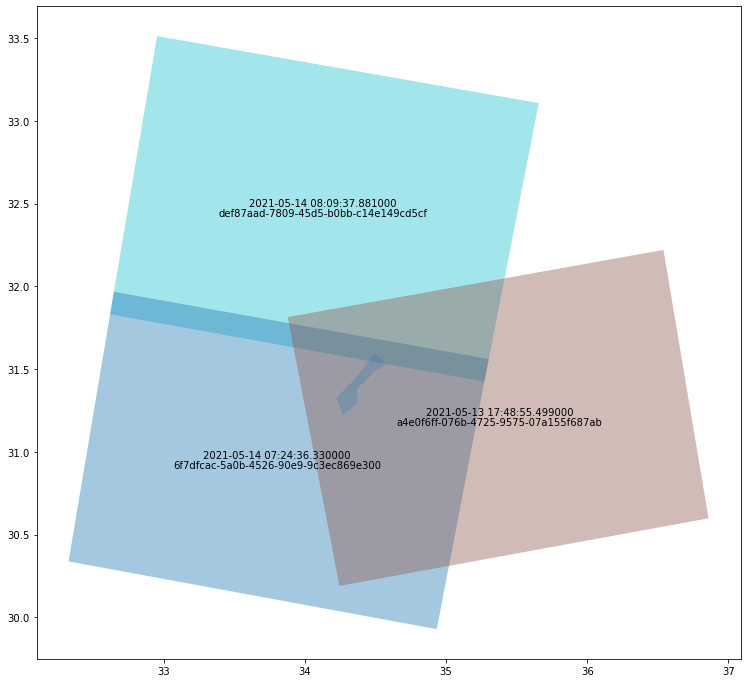

In [14]:
fig, ax = plt.subplots(figsize=(25,12))
areas_s1[:].plot(column='uuid', cmap=None, ax=ax, alpha=0.4)
areas_s1[:].apply(lambda x: ax.annotate(s=x.uuid, xy=x.geometry.centroid.coords[0], va='top', ha='center'),axis=1)
areas_s1[:].apply(lambda x: ax.annotate(s=x.ingestiondate, xy=x.geometry.centroid.coords[0], va='bottom', ha='center'),axis=1)
gdf.plot(ax=ax, alpha=0.25)

C:\Users\Work\anaconda3\envs\geo_env\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Work\anaconda3\envs\geo_env\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  after removing the cwd from sys.path.


<AxesSubplot:>

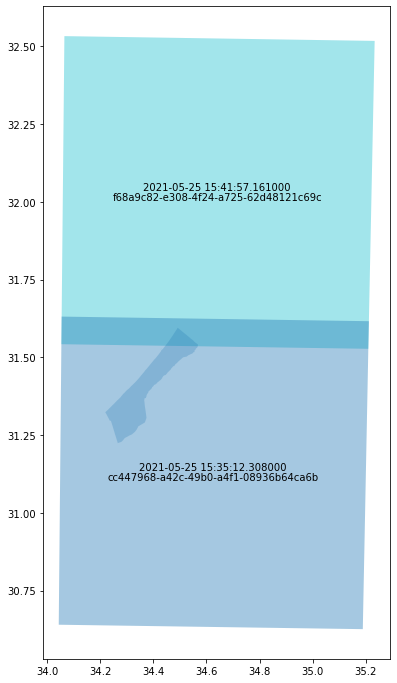

In [11]:
fig, ax = plt.subplots(figsize=(25,12))
areas_s2[:2].plot(column='uuid', cmap=None, ax=ax, alpha=0.4)
areas_s2[:2].apply(lambda x: ax.annotate(s=x.uuid, xy=x.geometry.centroid.coords[0], va='top', ha='center'),axis=1)
areas_s2[:2].apply(lambda x: ax.annotate(s=x.ingestiondate, xy=x.geometry.centroid.coords[0], va='bottom', ha='center'),axis=1)
gdf.plot(ax=ax, alpha=0.25)

In [12]:
areas_s2[['cloudcoverpercentage','ingestiondate']]

,cloudcoverpercentage,ingestiondate
f68a9c82-e308-4f24-a725-62d48121c69c,0.770605,2021-05-25 15:41:57.161
cc447968-a42c-49b0-a4f1-08936b64ca6b,0.206784,2021-05-25 15:35:12.308
0031aafc-7c8e-45f2-9dbc-08014958fd3c,0.301416,2021-05-20 15:14:47.372
2dc350ce-c92a-491b-96cc-aa055ddd0a59,0.875624,2021-05-20 15:13:40.668


In [72]:
areas_s1[areas_s1.uuid == '2bb799fe-3dff-46c1-8f60-33db321d42da']

,title,link,link_alternative,link_icon,summary,ondemand,beginposition,endposition,ingestiondate,missiondatatakeid,...,producttype,platformname,platformidentifier,instrumentname,instrumentshortname,productclass,polarisationmode,acquisitiontype,uuid,geometry
2bb799fe-3dff-46c1-8f60-33db321d42da,S1B_IW_SLC__1SDV_20210502T034345_20210502T0344...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2021-05-02T03:43:45.627Z, Instrument: SA...",false,2021-05-02 03:43:45.627,2021-05-02 03:44:12.713,2021-05-02 08:21:28.491,209169,...,SLC,Sentinel-1,2016-025A,Synthetic Aperture Radar (C-band),SAR-C SAR,S,VV VH,NOMINAL,2bb799fe-3dff-46c1-8f60-33db321d42da,"MULTIPOLYGON (((34.93588 29.92803, 35.30353 31..."


In [15]:
areas_s1

,title,link,link_alternative,link_icon,summary,ondemand,beginposition,endposition,ingestiondate,missiondatatakeid,...,producttype,platformname,platformidentifier,instrumentname,instrumentshortname,productclass,polarisationmode,acquisitiontype,uuid,geometry
def87aad-7809-45d5-b0bb-c14e149cd5cf,S1B_IW_SLC__1SDV_20210514T034320_20210514T0343...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2021-05-14T03:43:20.712Z, Instrument: SA...",false,2021-05-14 03:43:20.712,2021-05-14 03:43:48.655,2021-05-14 08:09:37.881,210572,...,SLC,Sentinel-1,2016-025A,Synthetic Aperture Radar (C-band),SAR-C SAR,S,VV VH,NOMINAL,def87aad-7809-45d5-b0bb-c14e149cd5cf,"MULTIPOLYGON (((35.27128 31.42427, 35.65636 33..."
6f7dfcac-5a0b-4526-90e9-9c3ec869e300,S1B_IW_SLC__1SDV_20210514T034346_20210514T0344...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2021-05-14T03:43:46.392Z, Instrument: SA...",false,2021-05-14 03:43:46.392,2021-05-14 03:44:13.474,2021-05-14 07:24:36.330,210572,...,SLC,Sentinel-1,2016-025A,Synthetic Aperture Radar (C-band),SAR-C SAR,S,VV VH,NOMINAL,6f7dfcac-5a0b-4526-90e9-9c3ec869e300,"MULTIPOLYGON (((34.93452 29.92856, 35.30210 31..."
a4e0f6ff-076b-4725-9575-07a155f687ab,S1B_IW_SLC__1SDV_20210513T153955_20210513T1540...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2021-05-13T15:39:55.705Z, Instrument: SA...",false,2021-05-13 15:39:55.705,2021-05-13 15:40:22.660,2021-05-13 17:48:55.499,210526,...,SLC,Sentinel-1,2016-025A,Synthetic Aperture Radar (C-band),SAR-C SAR,S,VV VH,NOMINAL,a4e0f6ff-076b-4725-9575-07a155f687ab,"MULTIPOLYGON (((34.24509 30.18979, 36.85876 30..."


In [21]:
api.download('6f7dfcac-5a0b-4526-90e9-9c3ec869e300', directory_path='../Data/Sentinel 1/')

Downloading:   0%|                                                                         | 0.00/3.79G [00:00<?, ?B/s]


SentinelAPIError: HTTP status 500 Internal Server Error: UnsupportedOperationException : Error creating stream from file /mnt/s1b/dhus/ntc/incoming/x9/x8/S1B_IW_SLC__1SDV_20210514T034346_20210514T034413_026895_03368C_CEF7.zip

In [13]:
# api.download('64284c54-a6c3-4249-b9dc-8c081766afe8', directory_path='../Data/Sentinel 2/') # Before
api.download('cc447968-a42c-49b0-a4f1-08936b64ca6b', directory_path='../Data/Sentinel 2/') # After May 25

Downloading: 100%|█████████████████████████████████████████████████████████████████| 1.19G/1.19G [32:27<00:00, 613kB/s]
MD5 checksumming: 100%|████████████████████████████████████████████████████████████| 1.19G/1.19G [00:02<00:00, 418MB/s]


{'id': 'cc447968-a42c-49b0-a4f1-08936b64ca6b',
 'title': 'S2B_MSIL2A_20210525T081609_N0300_R121_T36RXV_20210525T105614',
 'size': 1194536841,
 'md5': 'cd58645868edab35fa0ac3e283790023',
 'date': datetime.datetime(2021, 5, 25, 8, 16, 9, 24000),
 'footprint': 'POLYGON((34.05447525679676 31.631192629547044,35.21174616651892 31.616388568048713,35.188893316618305 30.62639025841939,34.0435716602511 30.640630141284124,34.05447525679676 31.631192629547044))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('cc447968-a42c-49b0-a4f1-08936b64ca6b')/$value",
 'Online': True,
 'Creation Date': datetime.datetime(2021, 5, 25, 15, 35, 57, 846000),
 'Ingestion Date': datetime.datetime(2021, 5, 25, 15, 35, 12, 308000),
 'path': '../Data/Sentinel 2/S2B_MSIL2A_20210525T081609_N0300_R121_T36RXV_20210525T105614.zip',
 'downloaded_bytes': 1194536841}

### Extract contents from the downloaded zip file

In [107]:
path_to_zip = r'../Mumbai/Raw/S2B_MSIL2A_20210417T053639_N0300_R005_T43QBB_20210417T083635.zip'
zip_ref = zipfile.ZipFile(path_to_zip, 'r')
zip_ref.extractall(r'../Mumbai/Raw/')
zip_ref.close()

### Remove downloaded zip file (Optional)

In [110]:
os.remove(path_to_zip)

### Visualize Band Composites

In [121]:
from shapely.geometry import MultiPolygon, Polygon
import rasterio as rio

In [146]:
# Navigate to R10 directory (contains 10m resolution bands)
R10 = r'..\Mumbai\Raw\S2B_MSIL2A_20210417T053639_N0300_R005_T43QBB_20210417T083635.SAFE\GRANULE\L2A_T43QBB_A021481_20210417T054332\IMG_DATA\R10m'
# preStr = R10.split('\\')[-3].split('_')[1] + '_' + R10.split('\\')[-3].split('_')[-1]
preStr = 'T43QBB_20210417T053639'
b4 = rio.open(R10 + '\\' + preStr +'_B04_10m.jp2')
b3 = rio.open(R10 + '\\' + preStr +'_B03_10m.jp2')
b2 = rio.open(R10 + '\\' + preStr +'_B02_10m.jp2')
b8 = rio.open(R10 + '\\' + preStr +'_B08_10m.jp2')

In [147]:
# Export all bands as a geotiff file 
with rio.open('../Mumbai/Raw/MCGM_Raw_20210417.tiff','w',driver='Gtiff', width=b4.width, height=b4.height, 
              count=4,crs=b4.crs,transform=b4.transform, dtype=b4.dtypes[0]) as raw:
    raw.write(b2.read(1),1) 
    raw.write(b3.read(1),2) 
    raw.write(b4.read(1),3)
    raw.write(b8.read(1),4)
    raw.close()

In [148]:
import rasterio.mask

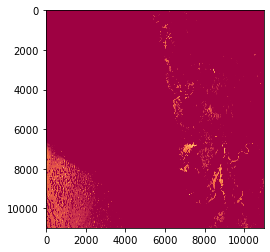

<AxesSubplot:>

### Resources

* http://www.acgeospatial.co.uk/sentinelsat_demo/
* https://www.hatarilabs.com/ih-en/sentinel2-images-explotarion-and-processing-with-python-and-rasterio
* https://rasterio.readthedocs.io/en/latest/topics/plotting.html
* https://www.youtube.com/watch?v=OUrex4SZzqc
* https://towardsdatascience.com/satellite-imagery-access-and-analysis-in-python-jupyter-notebooks-387971ece84b